In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import lasio
import numpy as np

In [20]:
las = lasio.read('ichthys_deep_1_wire_public_2010_sdb.las')

Only engine='normal' can read wrapped files


In [21]:
print(las.curves)

Mnemonic  Unit  Value  Description                                                      
--------  ----  -----  -----------                                                      
DEPTH     M                                                                             
AFEC      1/S          =IFC(DEPTH>4962  ""  AFEC)                                       
ANEC      1/S          =IFC(DEPTH>4962  ""  ANEC)                                       
APLC      V/V          =IFC(DEPTH>4962  ""  APLC)                                       
BS        IN           Values changed using TEXT_EDIT                                   
CALI      IN           Values changed using TEXT_EDIT                                   
DENS      G/C3         Merged WIRE_J.RHOM_5 and WIRE_S4R1_EC_ORIG.RHOM_1 at 4854.35     
DENSC     G/C3         Merged WIRE_J.DRH_5 and WIRE_S4R1_EC_ORIG.DRH_1 at 4854.35       
DRH       G/C3         Merged WIRE_J.DRH_5 and WIRE_S4R1_EC_ORIG.DRH_1 at 4854.35       
DT        US/F       

In [22]:
sonic_data = las.df().reset_index()

In [23]:
sonic_data['DEPTH']

0         233.1720
1         233.3244
2         233.4768
3         233.6292
4         233.7816
           ...    
31078    4969.4592
31079    4969.6116
31080    4969.7640
31081    4969.9164
31082    4970.0688
Name: DEPTH, Length: 31083, dtype: float64

In [9]:
data = las.df()
data.rename_axis('DEPTH').reset_index()

,DEPTH,AFEC,ANEC,APLC,BS,CALI,DENS,DENSC,DRH,DT,...,PR,PR_C,RESD,RESM,RESS,RHOM,SIGF,TENS,VPVS,VPVS_C
0,233.1720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,233.3244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,233.4768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,233.6292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,233.7816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31078,4969.4592,NaN,NaN,NaN,8.5,NaN,2.6681,0.111585,0.111585,NaN,...,NaN,NaN,NaN,NaN,NaN,2.6681,NaN,5213.0,NaN,NaN
31079,4969.6116,NaN,NaN,NaN,8.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5205.0,NaN,NaN
31080,4969.7640,NaN,NaN,NaN,8.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31081,4969.9164,NaN,NaN,NaN,8.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
data.columns


Index(['AFEC', 'ANEC', 'APLC', 'BS', 'CALI', 'DENS', 'DENSC', 'DRH', 'DT',
       'DTCO', 'DTCO_C', 'DTSH', 'DTSM_C', 'FPLC', 'GR', 'HFK', 'HTHO', 'HURA',
       'NDS', 'NEUT', 'PEF', 'PR', 'PR_C', 'RESD', 'RESM', 'RESS', 'RHOM',
       'SIGF', 'TENS', 'VPVS', 'VPVS_C'],
      dtype='object')

Only engine='normal' can read wrapped files


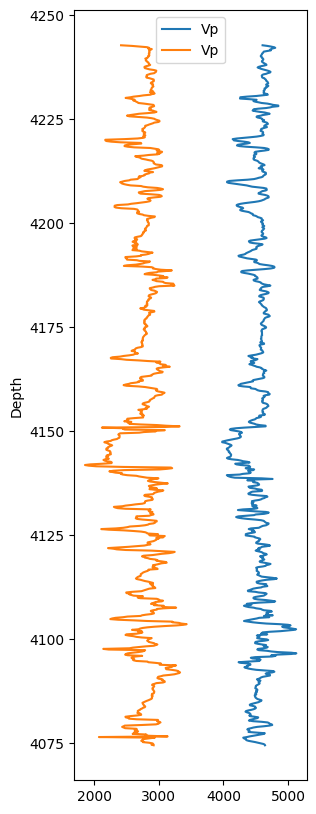

In [40]:
df_4=lasio.read('ichthys_deep_1_wire_public_2010_sdb.LAS').df().reset_index()
df_4

td =4074.5
bd = 4242.9
depth  = df_4['DEPTH'].to_numpy()[np.where(np.logical_and(df_4['DEPTH'].to_numpy()>=td,df_4['DEPTH'].to_numpy()<=bd))]

vp=df_4['DTCO_C'].to_numpy()[np.where(np.logical_and(df_4['DEPTH'].to_numpy()>=td,df_4['DEPTH'].to_numpy()<=bd))]
vs=df_4['DTSM_C'].to_numpy()[np.where(np.logical_and(df_4['DEPTH'].to_numpy()>=td,df_4['DEPTH'].to_numpy()<=bd))]

por=df_4['APLC'].to_numpy()[np.where(np.logical_and(df_4['DEPTH'].to_numpy()>=td,df_4['DEPTH'].to_numpy()<=bd))]
plt.figure(figsize=(3,10))
vp_corrected=304800/vp
vs_corrected=304800/vs

plt.plot(vp_corrected,depth,label = 'Vp')
plt.plot(vs_corrected,depth,label = 'Vp')
plt.ylabel('Depth')
plt.legend()

In [29]:
# df_4=lasio.read('ichthys_deep_1_wire_public_2010_sdb.LAS').df().reset_index()
# df_4

In [28]:
las7 = lasio.read('IchthysDeep-1_client_edit.las')
data7 = las7.df().reset_index()

# data7.dropna()

# data7 = data7.rename_axis('DEPTH').reset_index()
# start_idx7 = data7[data7['DEPTH']== 4074.56680].index.values
# end_idx7 = data7[data7['DEPTH']== 4242.96880].index.values


# print(start_idx7)


# data7= data7.iloc[end_idx7[0]:start_idx7[0]]
# print(data7.shape)
data7

,DEPT,HFK,HSGR,HCGR,HUPR,HTUR,HTPR,HURA,HTHO,LCAL:1,...,AE20,AE30,AE60,AE90,AE10,AT10,AT20,AT30,AT60,AT90
0,4969.6120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4969.5358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4969.4596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4969.3834,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4969.3072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61942,249.6316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61943,249.5554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61944,249.4792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61945,249.4030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
td =4074.5
bd = 4242.9

depth  = df_4['DEPTH'].to_numpy()[np.where(np.logical_and(df_4['DEPTH'].to_numpy()>=td,df_4['DEPTH'].to_numpy()<=bd))]


ATRT = data7['ATRT'].to_numpy()[np.where(np.logical_and(df_4['DEPTH'].to_numpy()>=td,df_4['DEPTH'].to_numpy()<=bd))]
AFRT = data7['AFRT'].to_numpy()[np.where(np.logical_and(df_4['DEPTH'].to_numpy()>=td,df_4['DEPTH'].to_numpy()<=bd))]
AORT = data7['AORT'].to_numpy()[np.where(np.logical_and(df_4['DEPTH'].to_numpy()>=td,df_4['DEPTH'].to_numpy()<=bd))]
ATRX = data7['ATRX'].to_numpy()[np.where(np.logical_and(df_4['DEPTH'].to_numpy()>=td,df_4['DEPTH'].to_numpy()<=bd))]
AFRX = data7['AFRX'].to_numpy()[np.where(np.logical_and(df_4['DEPTH'].to_numpy()>=td,df_4['DEPTH'].to_numpy()<=bd))]
AORX = data7['AORX'].to_numpy()[np.where(np.logical_and(df_4['DEPTH'].to_numpy()>=td,df_4['DEPTH'].to_numpy()<=bd))]

(1105,)

In [36]:
temp = {'Four_RT': AFRT,
        'Two_RT' : ATRT,
        'One_RT' : AORT,
        'Four_RX': AFRX,
        'Two_RX' : ATRX,
        'One_RX' : AORX,
        'DTCO' :   vp,
        'DTSH' :   vs}
res_df = pd.DataFrame(temp)

res_df

,Four_RT,Two_RT,One_RT,Four_RX,Two_RX,One_RX,DTCO,DTSH
0,0.77864,0.77152,0.76816,0.79412,0.79461,0.78922,65.8937,104.4344
1,0.78184,0.77585,0.77438,0.79697,0.79834,0.79411,66.0644,105.6775
2,0.78522,0.78040,0.78152,0.80007,0.80234,0.79987,65.4293,104.6524
3,0.78873,0.78500,0.78915,0.80336,0.80645,0.80620,65.8046,105.0880
4,0.79231,0.78947,0.79661,0.80680,0.81050,0.81258,65.6507,107.0676
...,...,...,...,...,...,...,...,...
1100,0.76089,0.75711,0.75288,0.78486,0.78449,0.77981,63.9491,107.0481
1101,0.76129,0.75861,0.75637,0.78600,0.78641,0.78367,64.5666,108.2560
1102,0.76173,0.76032,0.76013,0.78720,0.78850,0.78778,65.3963,113.1766
1103,0.76218,0.76209,0.76373,0.78841,0.79060,0.79167,66.5163,118.0417


In [37]:
res_df.to_csv('res_df.csv',index = False)